In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sentiment140_vader4_sinlematizar.csv')

In [3]:
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing
...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...


In [4]:
df['word_count_sinl']=df['preprocesado_sinlematizar'].apply(lambda x: len (x.split()))

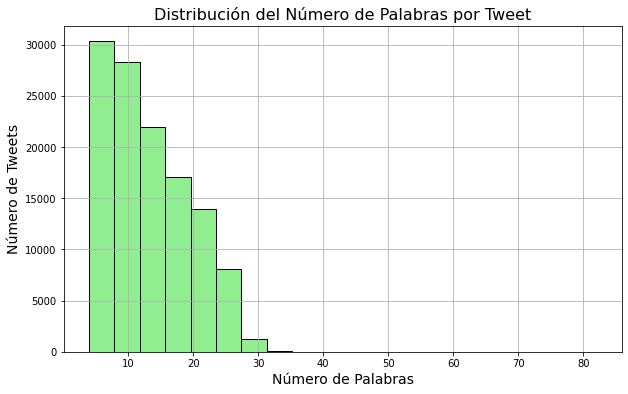

In [5]:
import matplotlib.pyplot as plt

# Crear un histograma del número de palabras por tweet
plt.figure(figsize=(10, 6))
plt.hist(df['word_count_sinl'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Número de Palabras por Tweet', fontsize=16)
plt.xlabel('Número de Palabras', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()

In [6]:
df['word_count_sinl'].value_counts().sort_values()

47       1
82       1
48       1
72       1
57       1
76       1
66       1
62       1
36       1
61       1
39       1
46       1
54       1
44       1
49       2
35       2
53       2
37       2
42       2
43       3
38       3
34       9
33      10
32      30
31      79
30     163
29     371
28     672
27    1145
26    1662
25    2362
24    2909
23    3112
22    3425
21    3651
20    3747
18    3969
19    4168
17    4316
16    4587
15    4884
14    5330
13    5558
12    6212
11    6522
10    6953
4     6983
9     7275
5     7519
8     7604
7     7904
6     7943
Name: word_count_sinl, dtype: int64

In [7]:
import numpy as np
percentil_95 = np.percentile(df['word_count_sinl'], 95)
percentil_95

25.0

In [7]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos original
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación


In [4]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=0.5))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy en el conjunto de prueba: 79.86%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.79      0.78     11190
    positivo       0.82      0.81      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [9]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=0.5))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy en el conjunto de prueba: 79.78%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.79      0.78     11190
    positivo       0.82      0.80      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [10]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=1.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.91%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.79      0.78     11190
    positivo       0.82      0.81      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [11]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=1.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.91%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.79      0.78     11190
    positivo       0.82      0.80      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [12]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=10.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.98%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.79      0.78     11190
    positivo       0.82      0.81      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [13]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=15.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.94%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.78      0.78     11190
    positivo       0.81      0.81      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.26%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.77      0.78     11190
    positivo       0.81      0.83      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.21%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.78      0.78     11190
    positivo       0.81      0.82      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.07%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.77      0.78     11190
    positivo       0.81      0.82      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.21%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.78      0.78     11190
    positivo       0.81      0.82      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.01%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.77      0.79     11190
    positivo       0.81      0.84      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.07%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.77      0.79     11190
    positivo       0.81      0.84      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.56%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.76      0.78     11190
    positivo       0.80      0.82      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.80      0.80      0.80     24221



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.73%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.77      0.78     11190
    positivo       0.81      0.82      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.68%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.76      0.78     11190
    positivo       0.80      0.83      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.79      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [22]:
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar,word_count_sinl
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...,12
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...,27
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...,16
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book,8
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...,13
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...,11
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet,8
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...,24


In [26]:
df[df['polarity']=='positive']

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar,word_count_sinl
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...,16
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book,8
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing,7
6,positive,2048261375,Fri Jun 05 14:55:10 PDT 2009,NO_QUERY,BarringtonJ,"@bigbroforums Okay, let me take a look on thei...",0.2263,okay let take look see,14,okay let me take a look on their and see what ...,1,okay let me take a look on their and see what ...,14
7,positive,2177583488,Mon Jun 15 06:21:32 PDT 2009,NO_QUERY,ianeenee,"Preparing for school tomorrow. To bed early, h...",0.4019,preparing school tomorrow bed early hopefully ...,20,preparing for school tomorrow to bed early hop...,1,preparing for school tomorrow to bed early hop...,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121098,positive,2187924044,Mon Jun 15 21:01:00 PDT 2009,NO_QUERY,prettyboib07,"@KweeniB how old r u, well its here now so jus...",0.2732,old r u well give,13,how old r u well it here now so just give it all,1,how old r u well its here now so just give it all,13
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...,11
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet,8
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...,24


CON STOPWORDS

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Dividir el conjunto de datos original
X = df['preprocesado_constopwords'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación


In [31]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=0.5))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.21%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.81      0.80     11190
    positivo       0.83      0.81      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [32]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=1.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.33%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.81      0.80     11190
    positivo       0.83      0.81      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [33]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=0.5))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.18%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.81      0.80     11190
    positivo       0.83      0.81      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [34]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el vectorizador y el modelo Naive Bayes
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización Bag of Words
    ('nb', MultinomialNB(alpha=1.0))  # Modelo Naive Bayes con parámetro de suavizado
])

# Ajustar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.17%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.81      0.80     11190
    positivo       0.83      0.81      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.92%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.80     11190
    positivo       0.83      0.84      0.83     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.95%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.80     11190
    positivo       0.83      0.84      0.83     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.81%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.80     11190
    positivo       0.83      0.84      0.83     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.13%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.79      0.80     11190
    positivo       0.82      0.83      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 82.33%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.81     11190
    positivo       0.83      0.84      0.84     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 82.08%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.81     11190
    positivo       0.83      0.84      0.83     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 82.96%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.81     11190
    positivo       0.84      0.85      0.84     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.01%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.81     11190
    positivo       0.84      0.85      0.84     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221

